In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 73.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
1,1,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 6,578,000円 買取 6,5...",0.000000,0.000000,Neutral
2,2,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
3,3,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
4,4,gbpusd gbpchf us100 nasdac gbpnzd gbpcad us30 ...,0.000000,0.000000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,80000,gbpusd dax nas100 sp500 us30 dow dow30 ger30 x...,0.0,0.0,Neutral
1,80001,babanın oğlu kemal güçlü.. altın ons gram dola...,0.0,0.0,Neutral
2,80002,double qm - xauusd chart,0.0,0.0,Neutral
3,80003,xauusd 4h ⬇️⬇️,0.0,0.0,Neutral
4,80004,btc dax nas100 sp500 us30 dow dow30 ger30 xauu...,0.0,0.0,Neutral


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [10]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 35
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 32
	99percentile : 40


In [12]:
# getting electra-base model.
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [14]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
5000/5000 [==============================] - 609s 115ms/step - loss: 0.1260 - accuracy: 0.9605 - val_loss: 0.1938 - val_accuracy: 0.9558
Epoch 2/5
5000/5000 [==============================] - 583s 114ms/step - loss: 0.0161 - accuracy: 0.9958 - val_loss: 0.5155 - val_accuracy: 0.8419
Epoch 3/5
5000/5000 [==============================] - 583s 113ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.8846 - val_accuracy: 0.8520
Epoch 4/5
5000/5000 [==============================] - 579s 113ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 1.1621 - val_accuracy: 0.8476
Epoch 5/5
5000/5000 [==============================] - 579s 113ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.3079 - val_accuracy: 0.8405


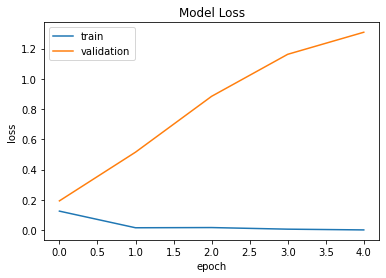

In [15]:
learner.plot('loss')

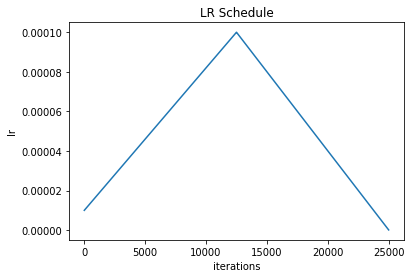

In [16]:
learner.plot('lr')

In [17]:
learner.validate()

470/470 [==============================] - 40s 79ms/step
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       477
           1       0.83      0.99      0.90     10618
           2       0.91      0.44      0.59      3918

    accuracy                           0.84     15013
   macro avg       0.90      0.72      0.78     15013
weighted avg       0.85      0.84      0.82     15013



array([[  353,    24,   100],
       [   10, 10539,    69],
       [    0,  2191,  1727]])